# NBA Salary versus Age Analysis

by Mary Brown

Analyze correlation between Age and NBA Salary, September 2019
1. Verify that NBA has top salaries by checking data on all sports salaries
2. Found data on top paid athletes for 2017
3. Average this by sport => yes BASKETBALL high average salary
4. count # of athletes with top salary in each sport => yes this is basketball
5. Now let's investigate other NBA player data
6. Look at years in the league => most players have been in league 5-12 years
7. Look at age versus salary data

In [207]:
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
from scipy.stats import linregress

import seaborn as sns
from sklearn.cluster import KMeans
color = sns.color_palette()
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
%matplotlib inline


# Top 25 Paid Athletes 2017

In [208]:
# read in data scraped from nypost.com=>forbes https://www.forbes.com/athletes/list/ 
# Worlds Highest Paid Athletes in 2017
topAthlete_data_2017_df = pd.read_csv("input/TopPaidAthletes2017.csv")

topAthlete_data_2017_df=topAthlete_data_2017_df.sort_values(by=['Rank'])
topAthlete_data_2017_df=topAthlete_data_2017_df.set_index('Rank')
topAthlete_data_2017_df.head()

,Name,Total Paid in Millions,Base Salary,"Endorsements, etc.",Sport,Country,Year,Source
Rank,,,,,,,,
1,Cristiano Ronaldo,93.0,58.0,35.0,Soccer,Portugal,2017,https://nypost.com/2017/06/07/the-top-25-highe...
2,LeBron James,86.2,31.2,55.0,Basketball,USA,2017,https://nypost.com/2017/06/07/the-top-25-highe...
3,Lionel Messi,80.0,53.0,27.0,Soccer,Argentina,2017,https://nypost.com/2017/06/07/the-top-25-highe...
4,Roger Federer,64.0,6.0,58.0,Tennis,Switzerland,2017,https://nypost.com/2017/06/07/the-top-25-highe...
5,Kevin Durant,60.6,23.6,34.0,Basketball,USA,2017,https://nypost.com/2017/06/07/the-top-25-highe...


In [209]:
#look at average salaries across various sports
AvgSalaryBySport = topAthlete_data_2017_df.groupby(['Sport','Country'],as_index=False)['Sport','Country','Total Paid in Millions','Base Salary'].mean()

In [210]:
topFiveSports=AvgSalaryBySport.head()
topFiveSports

,Sport,Country,Total Paid in Millions,Base Salary
0,Basketball,USA,48.525000,23.650000
1,Football,USA,47.650000,39.150000
2,Golf,Ireland,50.000000,16.000000
3,Golf,USA,38.366667,3.035667
4,Mixed Martial Arts,Ireland,34.000000,27.000000


In [211]:
# of top salaries how many of these are Basketball
NumAthleteTopSalary = topAthlete_data_2017_df.groupby(['Sport'],as_index=False).count()
NumAthleteTopSalary=NumAthleteTopSalary[['Sport','Name']]
NumAthleteTopSalary

,Sport,Name
0,Basketball,8
1,Football,2
2,Golf,4
3,Mixed Martial Arts,1
4,Race Car Driver,3
5,Soccer,4
6,Tennis,2
7,Track,1


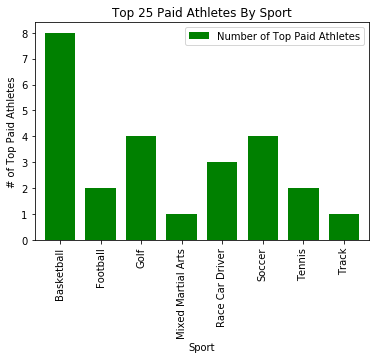

In [212]:
NumAthleteTopSalary.plot(x="Sport", y=["Name"], kind="bar",align="center",width=0.75,color="green")
plt.title("Top 25 Paid Athletes By Sport")
#plt.xlabel("Sport")
plt.ylabel("# of Top Paid Athletes")
plt.legend(['Number of Top Paid Athletes'],loc='best', fontsize=10)

plt.savefig('output/figure_1_2017_Top_25_Paid_Athletes.jpg', dpi=300)  
plt.show()

Graph confirms that NBA has the most top paid sports players

# Analyze other NBA player data
Look at player data covering 1950s to current. 
Looking at how long players in the league

In [213]:
# data from kaggle => https://www.kaggle.com/drgilermo/nba-players-stats
player_data_df = pd.read_csv("input/player_data.csv");player_data_df.head()

,name,year_start,year_end,position,height,weight,birth_date,college
0,Alaa Abdelnaby,1991,1995,F-C,6-10,240.0,"June 24, 1968",Duke University
1,Zaid Abdul-Aziz,1969,1978,C-F,6-9,235.0,"April 7, 1946",Iowa State University
2,Kareem Abdul-Jabbar,1970,1989,C,7-2,225.0,"April 16, 1947","University of California, Los Angeles"
3,Mahmoud Abdul-Rauf,1991,2001,G,6-1,162.0,"March 9, 1969",Louisiana State University
4,Tariq Abdul-Wahad,1998,2003,F,6-6,223.0,"November 3, 1974",San Jose State University


In [214]:
#try to correlate between age and years in league
player_data_df["Years In League"]=yrsLeage_data_df=player_data_df["year_end"]-player_data_df["year_start"]+1
yrsLeage_data_df.describe()

count    4550.000000
mean        5.196264
std         4.503284
min         1.000000
25%         1.000000
50%         3.000000
75%         8.000000
max        23.000000
dtype: float64

=> Conclusion ... NBA Players typically play for approximately 5-8 years

In [215]:
player_data_df.head()

,name,year_start,year_end,position,height,weight,birth_date,college,Years In League
0,Alaa Abdelnaby,1991,1995,F-C,6-10,240.0,"June 24, 1968",Duke University,5
1,Zaid Abdul-Aziz,1969,1978,C-F,6-9,235.0,"April 7, 1946",Iowa State University,10
2,Kareem Abdul-Jabbar,1970,1989,C,7-2,225.0,"April 16, 1947","University of California, Los Angeles",20
3,Mahmoud Abdul-Rauf,1991,2001,G,6-1,162.0,"March 9, 1969",Louisiana State University,11
4,Tariq Abdul-Wahad,1998,2003,F,6-6,223.0,"November 3, 1974",San Jose State University,6


In [216]:
#Looking at number of players at each age
AverageNBAtime = player_data_df.groupby(["Years In League"],as_index=False)
NumAthleteYears = AverageNBAtime['name'].count()
NumAthleteYears

,Years In League,name
0,1,1317
1,2,566
2,3,394
3,4,314
4,5,245
5,6,217
6,7,195
7,8,194
8,9,171
9,10,211


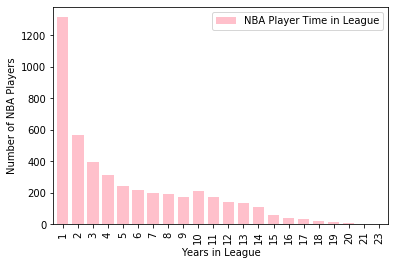

In [217]:
NumAthleteYears.plot(x="Years In League", y="name", kind="bar",align="center",width=0.75,color="pink")

plt.xlabel("Years in League")
plt.ylabel("Number of NBA Players")
plt.legend(['NBA Player Time in League'],loc='best', fontsize=10)

plt.savefig('output/figure_2_Lifetime_NBA_Player_Time_In_League.jpg', dpi=300)  
plt.show()

In [218]:
player_data_df.head()

,name,year_start,year_end,position,height,weight,birth_date,college,Years In League
0,Alaa Abdelnaby,1991,1995,F-C,6-10,240.0,"June 24, 1968",Duke University,5
1,Zaid Abdul-Aziz,1969,1978,C-F,6-9,235.0,"April 7, 1946",Iowa State University,10
2,Kareem Abdul-Jabbar,1970,1989,C,7-2,225.0,"April 16, 1947","University of California, Los Angeles",20
3,Mahmoud Abdul-Rauf,1991,2001,G,6-1,162.0,"March 9, 1969",Louisiana State University,11
4,Tariq Abdul-Wahad,1998,2003,F,6-6,223.0,"November 3, 1974",San Jose State University,6


In [219]:
#try to calculate age
#now = pd.Timestamp('now')
#player_data_df["PlayerAge"]=now - player_data_df["birthdate"]
# not successful, so need to find dataset with Age in it already

In [220]:
#limit to players who were in the league in 2017
recentPlayer_data_df = player_data_df.loc[player_data_df["year_end"] >=2017]
recentPlayer_data_df = recentPlayer_data_df.loc[recentPlayer_data_df["year_start"] <2017]
recentPlayer_data_df.head()

,name,year_start,year_end,position,height,weight,birth_date,college,Years In League
14,Quincy Acy,2013,2018,F,6-7,240.0,"October 6, 1990",Baylor University,6
21,Steven Adams,2014,2018,C,7-0,255.0,"July 20, 1993",University of Pittsburgh,5
26,Arron Afflalo,2008,2018,G,6-5,210.0,"October 15, 1985","University of California, Los Angeles",11
32,Alexis Ajinca,2009,2017,C,7-2,248.0,"May 6, 1988",NaN,9
39,Cole Aldrich,2011,2018,C,6-11,250.0,"October 31, 1988",University of Kansas,8


In [221]:
#try to correlate between age and years in league
recentPlayer_data_df["Years In League"]=recentPlayer_data_df["year_end"]-recentPlayer_data_df["year_start"]
recentPlayer_data_df.head()

,name,year_start,year_end,position,height,weight,birth_date,college,Years In League
14,Quincy Acy,2013,2018,F,6-7,240.0,"October 6, 1990",Baylor University,5
21,Steven Adams,2014,2018,C,7-0,255.0,"July 20, 1993",University of Pittsburgh,4
26,Arron Afflalo,2008,2018,G,6-5,210.0,"October 15, 1985","University of California, Los Angeles",10
32,Alexis Ajinca,2009,2017,C,7-2,248.0,"May 6, 1988",NaN,8
39,Cole Aldrich,2011,2018,C,6-11,250.0,"October 31, 1988",University of Kansas,7


In [222]:
# found data that has age and salary in one dataset
# read in data from Kaggle.com
# https://www.kaggle.com/liujiaqi/nba-player-social-power-performance-effect
nba_data_2017_df = pd.read_csv("input/nba_2017_nba_players_with_salary.csv");
nba_data_2017_df.head()

,Unnamed: 0,Rk,PLAYER,POSITION,AGE,MP,FG,FGA,FG%,3P,...,GP,MPG,ORPM,DRPM,RPM,WINS_RPM,PIE,PACE,W,SALARY_MILLIONS
0,0,1,Russell Westbrook,PG,28,34.6,10.2,24.0,0.425,2.5,...,81,34.6,6.74,-0.47,6.27,17.34,23.0,102.31,46,26.50
1,1,2,James Harden,PG,27,36.4,8.3,18.9,0.440,3.2,...,81,36.4,6.38,-1.57,4.81,15.54,19.0,102.98,54,26.50
2,2,3,Isaiah Thomas,PG,27,33.8,9.0,19.4,0.463,3.2,...,76,33.8,5.72,-3.89,1.83,8.19,16.1,99.84,51,6.59
3,3,4,Anthony Davis,C,23,36.1,10.3,20.3,0.505,0.5,...,75,36.1,0.45,3.90,4.35,12.81,19.2,100.19,31,22.12
4,4,6,DeMarcus Cousins,C,26,34.2,9.0,19.9,0.452,1.8,...,72,34.2,3.56,0.64,4.20,11.26,17.8,97.11,30,16.96


In [223]:
nba_data_2017_df = nba_data_2017_df.loc[:, ~nba_data_2017_df.columns.str.contains('^Unnamed')]
nba_data_2017_df.head()

,Rk,PLAYER,POSITION,AGE,MP,FG,FGA,FG%,3P,3PA,...,GP,MPG,ORPM,DRPM,RPM,WINS_RPM,PIE,PACE,W,SALARY_MILLIONS
0,1,Russell Westbrook,PG,28,34.6,10.2,24.0,0.425,2.5,7.2,...,81,34.6,6.74,-0.47,6.27,17.34,23.0,102.31,46,26.50
1,2,James Harden,PG,27,36.4,8.3,18.9,0.440,3.2,9.3,...,81,36.4,6.38,-1.57,4.81,15.54,19.0,102.98,54,26.50
2,3,Isaiah Thomas,PG,27,33.8,9.0,19.4,0.463,3.2,8.5,...,76,33.8,5.72,-3.89,1.83,8.19,16.1,99.84,51,6.59
3,4,Anthony Davis,C,23,36.1,10.3,20.3,0.505,0.5,1.8,...,75,36.1,0.45,3.90,4.35,12.81,19.2,100.19,31,22.12
4,6,DeMarcus Cousins,C,26,34.2,9.0,19.9,0.452,1.8,5.0,...,72,34.2,3.56,0.64,4.20,11.26,17.8,97.11,30,16.96


In [224]:
nba_data_2017_df.dtypes

Rk                   int64
PLAYER              object
POSITION            object
AGE                  int64
MP                 float64
FG                 float64
FGA                float64
FG%                float64
3P                 float64
3PA                float64
3P%                float64
2P                 float64
2PA                float64
2P%                float64
eFG%               float64
FT                 float64
FTA                float64
FT%                float64
ORB                float64
DRB                float64
TRB                float64
AST                float64
STL                float64
BLK                float64
TOV                float64
PF                 float64
POINTS             float64
TEAM                object
GP                   int64
MPG                float64
ORPM               float64
DRPM               float64
RPM                float64
WINS_RPM           float64
PIE                float64
PACE               float64
W                    int64
S

In [225]:
nba_data_2017_df=nba_data_2017_df.drop(['POSITION','MP','FG','FGA','FG%','3P','3PA','3P%','2P','2PA','2P%','eFG%','FT','FTA','FT%','ORB','DRB','TRB','AST','STL','BLK','TOV','PF','POINTS','TEAM','GP','MPG','ORPM','DRPM','RPM','WINS_RPM','PIE','PACE','W'], axis=1)

In [226]:
# Statistics regarding NBA Player Age in 2017
nba_data_2017_df['AGE'].describe()

count    342.000000
mean      26.444444
std        4.295686
min       19.000000
25%       23.000000
50%       26.000000
75%       29.000000
max       40.000000
Name: AGE, dtype: float64

In [227]:
# Average 2017 NBA Salary
nba_data_2017_df["SALARY_MILLIONS"].mean()

7.294005847953212

In [228]:
#Statistics regarding NBA Salary in 2017
nba_data_2017_df["SALARY_MILLIONS"].describe()

count    342.000000
mean       7.294006
std        6.516326
min        0.030000
25%        2.185000
50%        4.920000
75%       11.110000
max       30.960000
Name: SALARY_MILLIONS, dtype: float64

In [229]:
#Looking at number of players at each age
CountPlayersByAge = nba_data_2017_df.groupby(['AGE'],as_index=False)['Rk'].count()
CountPlayersByAge=CountPlayersByAge.rename(columns={"Rk": "PLAYER"})
CountPlayersByAge

,AGE,PLAYER
0,19,7
1,20,15
2,21,22
3,22,31
4,23,21
5,24,27
6,25,31
7,26,26
8,27,26
9,28,31


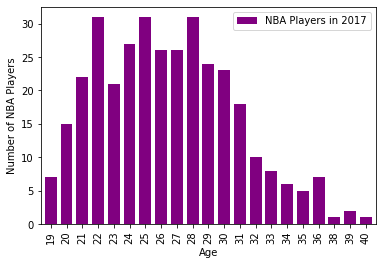

In [230]:
CountPlayersByAge.plot(x="AGE", y=["PLAYER"], kind="bar",align="center",width=0.75,color="purple")
#plt.title("Number of NBA Players By Age")
plt.xlabel("Age")
plt.ylabel("Number of NBA Players")
plt.legend(['NBA Players in 2017'],loc='best', fontsize=10)

plt.savefig('output/figure_3_2017_Number_of_NBA_Players_By_Age.jpg', dpi=300)  
plt.show()

In [231]:
AvgSalaryByAge = nba_data_2017_df.groupby(['AGE'],as_index=False)['AGE','SALARY_MILLIONS'].mean()

In [232]:
AvgSalaryByAge

,AGE,SALARY_MILLIONS
0,19,3.112857
1,20,2.439333
2,21,2.891818
3,22,1.975484
4,23,5.399524
5,24,7.451111
6,25,5.497097
7,26,10.709231
8,27,8.603462
9,28,11.881290


In [233]:
#NOTE Colby at Age 38 is an outlier :)

In [234]:
#SemSalryByAge = trial_data_complete.groupby(['Drug','Timepoint']).sem()
SEMsalaryByAge = nba_data_2017_df.groupby(['AGE'])['AGE','SALARY_MILLIONS'].sem()
SEMsalaryByAge

,AGE,SALARY_MILLIONS
AGE,,
19,0.0,0.499436
20,0.0,0.315281
21,0.0,0.349086
22,0.0,0.188689
23,0.0,1.361441
24,0.0,1.257846
25,0.0,0.902569
26,0.0,1.220065
27,0.0,1.215580


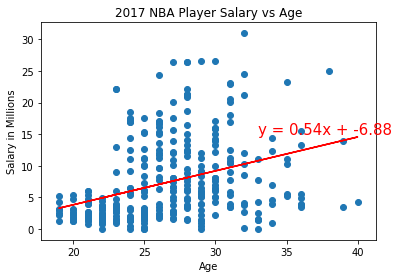

In [235]:
# scatter plot of all player salaries by age

#linear regression
plt.xlabel("Age")
plt.ylabel("Salary in Millions")
plt.title("2017 NBA Player Salary vs Age")
x_values = nba_data_2017_df["AGE"]
y_values = nba_data_2017_df["SALARY_MILLIONS"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(33,15),fontsize=15,color="red")
plt.scatter(x_values,y_values)
plt.savefig('output/figure_4_2017_NBA_All_Salary_Vs_Age.jpg', dpi=300)  
plt.show()

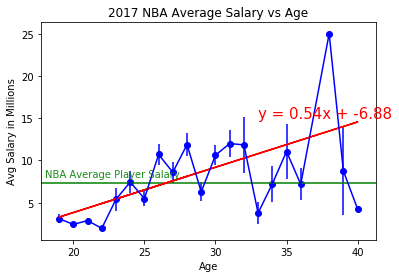

In [236]:
#scatter plot
plt.xlabel("Age")
plt.ylabel("Avg Salary in Millions")
plt.title("2017 NBA Average Salary vs Age")

# Indicate NBA average salary 
plt.text(x=18, y=8, s='NBA Average Player Salary', alpha=0.9, color='green')
plt.axhline(y=nba_data_2017_df["SALARY_MILLIONS"].mean(), color='green', linestyle='-')

#linear regression
x_values = nba_data_2017_df["AGE"]
y_values = nba_data_2017_df["SALARY_MILLIONS"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(33,15),fontsize=15,color="red")

# scatter plot
plt.scatter(AvgSalaryByAge["AGE"],AvgSalaryByAge["SALARY_MILLIONS"],color="blue")
plt.errorbar(AvgSalaryByAge["AGE"],AvgSalaryByAge["SALARY_MILLIONS"],SEMsalaryByAge['SALARY_MILLIONS'],color="blue")

plt.savefig('output/figure_5_2017_NBA_Avg_Salary_By_Age.jpg', dpi=300)  
plt.show()

In [237]:
# compute the Pearson correlation coefficient between "Age" and "Salary"

import scipy.stats as st
player_salary = nba_data_2017_df.loc[:,"SALARY_MILLIONS"]
age = nba_data_2017_df.loc[:,"AGE"]
AgeCorrelation = st.pearsonr(player_salary, age)
print(f"The correlation between player salary and player age is {round(AgeCorrelation[0],2)}")

The correlation between player salary and player age is 0.35


In [238]:
# compute the Pearson correlation coefficient between "Age" and "Salary"

import scipy.stats as st
player_salary = AvgSalaryByAge.loc[:,"SALARY_MILLIONS"]
age = AvgSalaryByAge.loc[:,"AGE"]
AgeCorrelation = st.pearsonr(player_salary, age)
print(f"The correlation between average player salary and player age is {round(AgeCorrelation[0],2)}")

The correlation between average player salary and player age is 0.5


# NBA Age Conclusion
1. Most players are in the league for less than 10 year
2. During that time, there is a moderate correlation between age and salary. 
3. Probably best to say with increasing age, we have increasing experience and better performance
and thus increased salary